# Continuous Control Project

---


### 1. Start the Environment

In [1]:
import torch
import numpy as np
import time
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from ddpg_agent import Agent, ReplayBuffer
from unityagents import UnityEnvironment

In [3]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## Examine the environment

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


## Initialize the agent

In [5]:
# Initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=1)

C:\Anaconda3\lib\site-packages\torch\cuda\__init__.py:116: UserWarning: 
    Found GPU1 NVS 310 which is of cuda capability 2.1.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


## DDPG learning

In [6]:
def ddpg(n_episodes=2000, max_t=1000, print_every=10, update_every=20, num_update=10, goal_score=30, parNum = 1):
    scores_deque = deque(maxlen=100)
    scores_all = []
    
    for i_episode in range(1, n_episodes+1):
        # Reset Env and Agent
        env_info = env.reset(train_mode=True)[brain_name]       # reset the environment    
        states = env_info.vector_observations                   # get the current state (for each agent)
        scores = np.zeros(num_agents)                            # initialize the score (for each agent)
        agent.reset()
        
        # Record the start time of one episode
        start_time = time.time()
        for t in range(max_t):
            # Take the actions based on the actor network of the agent
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]            # send all actions to the environment
            next_states = env_info.vector_observations          # get next state (for each agent)
            rewards = env_info.rewards                          # get reward (for each agent)
            dones = env_info.local_done                         # see if episode finished
            
            # send the state-action-reward pair to the agent
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done) 
            
            scores += env_info.rewards                           # update the score (for each agent)
            states = next_states                                # roll over states to next time step
            
            # Update the network regularly
            if t%update_every == 0:
                for _ in range(num_update):
                    agent.start_learn()
            # exit loop if episode finished
            if np.any(dones):                                   
                break
    
        mean_score = np.mean(scores)
        
        scores_deque.append(mean_score)
        scores_all.append(mean_score)
        average_score = np.mean(scores_deque)
        duration = time.time() - start_time
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tMean within episode: {:.2f}\tTrain Time: {:.2f}'
              .format(i_episode, average_score, mean_score, duration))
        if average_score >= goal_score and i_episode >= 100:
            print('Problem Solved after {} epsisodes!! Average score: {:.2f}'.format(i_episode, average_score))
            torch.save(agent.actorNet_local.state_dict(), 'actor_net.pth')
            torch.save(agent.criticNet_local.state_dict(), 'critic_net.pth')
            break
    
    return scores_all

scores = ddpg()

Episode 1	Average Score: 0.67	Mean within episode: 0.67	Train Time: 26.57
Episode 2	Average Score: 0.76	Mean within episode: 0.85	Train Time: 26.18
Episode 3	Average Score: 0.85	Mean within episode: 1.03	Train Time: 25.83
Episode 4	Average Score: 0.92	Mean within episode: 1.12	Train Time: 25.98
Episode 5	Average Score: 0.99	Mean within episode: 1.25	Train Time: 26.06
Episode 6	Average Score: 1.05	Mean within episode: 1.39	Train Time: 26.11
Episode 7	Average Score: 1.09	Mean within episode: 1.27	Train Time: 26.05
Episode 8	Average Score: 1.15	Mean within episode: 1.61	Train Time: 26.12
Episode 9	Average Score: 1.22	Mean within episode: 1.73	Train Time: 26.01
Episode 10	Average Score: 1.29	Mean within episode: 1.99	Train Time: 26.20
Episode 11	Average Score: 1.33	Mean within episode: 1.73	Train Time: 26.10
Episode 12	Average Score: 1.40	Mean within episode: 2.13	Train Time: 25.99
Episode 13	Average Score: 1.50	Mean within episode: 2.70	Train Time: 26.12
Episode 14	Average Score: 1.59	Mea

Episode 109	Average Score: 25.76	Mean within episode: 37.30	Train Time: 26.32
Episode 110	Average Score: 26.10	Mean within episode: 36.34	Train Time: 26.34
Episode 111	Average Score: 26.46	Mean within episode: 38.10	Train Time: 26.37
Episode 112	Average Score: 26.82	Mean within episode: 37.35	Train Time: 26.26
Episode 113	Average Score: 27.17	Mean within episode: 37.80	Train Time: 29.67
Episode 114	Average Score: 27.49	Mean within episode: 35.20	Train Time: 28.53
Episode 115	Average Score: 27.82	Mean within episode: 35.96	Train Time: 31.84
Episode 116	Average Score: 28.15	Mean within episode: 35.92	Train Time: 26.28
Episode 117	Average Score: 28.49	Mean within episode: 37.21	Train Time: 26.24
Episode 118	Average Score: 28.80	Mean within episode: 35.09	Train Time: 26.32
Episode 119	Average Score: 29.10	Mean within episode: 35.31	Train Time: 26.27
Episode 120	Average Score: 29.42	Mean within episode: 35.16	Train Time: 26.27
Episode 121	Average Score: 29.72	Mean within episode: 35.95	Trai

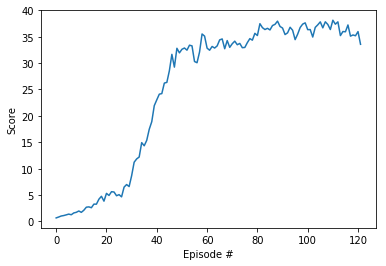

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
fig.savefig('score_vs_episode.jpg',dpi = 300)
plt.close()